Acurácia: 0.5


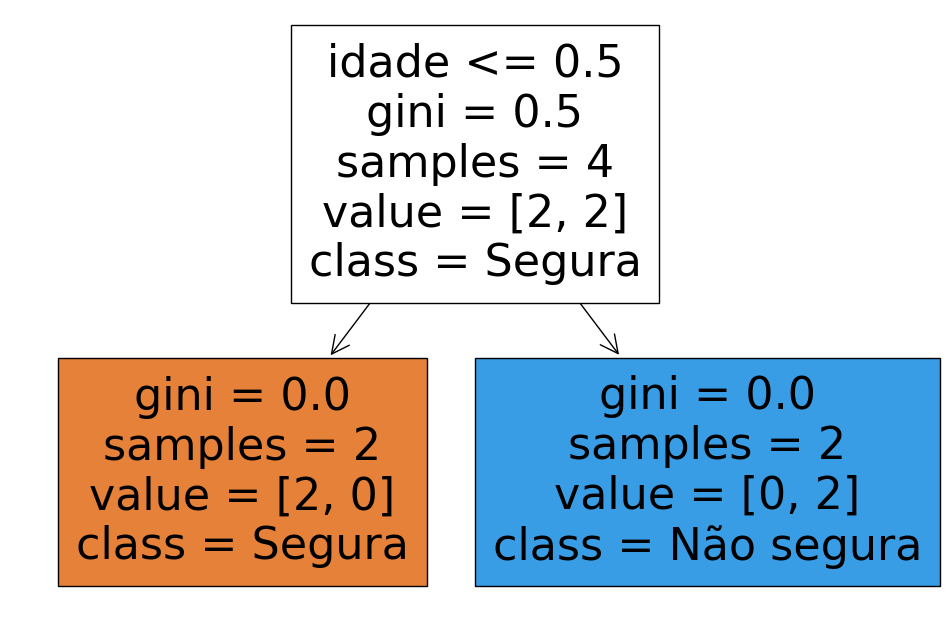

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Dados de treinamento
idade = np.array([5, 10, 3, 8, 1, 15])
hist_falhas = np.array(['Bom', 'Ruim', 'Excelente', 'Regular', 'Excelente', 'Ruim'])
n_falhas = np.array([0, 3, 0, 2, 0, 5])
nivel_auto = np.array(['Alto', 'Baixo', 'Médio', 'Alto', 'Médio', 'Baixo'])
classi = np.array(['Segura', 'Não segura', 'Segura', 'Não segura', 'Segura', 'Não segura'])

# Organizar os dados em um único array
dados = np.column_stack((idade, hist_falhas, n_falhas, nivel_auto))

# Codificar atributos categóricos usando one-hot com handle_unknown='ignore'
colunas_categoricas = [1, 3]  # Índices das colunas categóricas
transformador = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)], remainder='passthrough')
pipeline = Pipeline(steps=[('preprocessamento', transformador),
                           ('modelo', DecisionTreeClassifier(random_state=42))])

# Definir variáveis dependentes e independentes
X = dados
y = classi

# Dividir os dados em conjunto de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
pipeline.fit(X_treinamento, y_treinamento)

# Fazer previsões
previsoes = pipeline.predict(X_teste)

# Avaliar o desempenho do modelo (usando a acurácia como exemplo)
acuracia = accuracy_score(y_teste, previsoes)
print("Acurácia:", acuracia)

# Visualizar a Árvore de Decisão
plt.figure(figsize=(12, 8))
plot_tree(pipeline.named_steps['modelo'], feature_names=['idade', 'hist_falhas', 'n_falhas', 'nivel_auto'], class_names=['Segura', 'Não segura'], filled=True)
plt.show()
